<a href="https://colab.research.google.com/github/Anshuman22coder/ML-projects/blob/main/Digit_Classification_USING_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# multi class classification
# using the mnist dataset
# usin ANN- flattening of the image pixels as the first layer ..

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten


In [7]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()


In [ ]:
X_train.shape  # X_train contains 60000  datas of images and each image is of the shape 28 by 28 pixels and printing X_train[0] will just print the 1st image ...and note that all cells contains pixels

(60000, 28, 28)

In [8]:
y_train  # contains 60000 nos .. telling which data is image is what in terms of  numbers ,,and so onn...

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

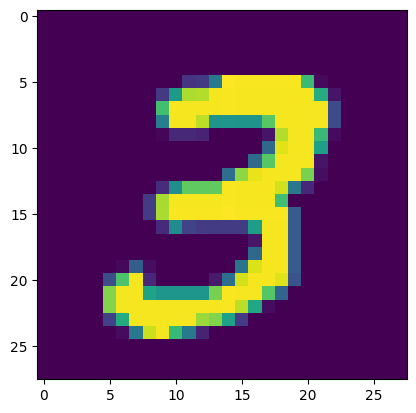

In [12]:
import matplotlib.pyplot as plt
plt.imshow(X_train[7])

In [14]:
# training an ANN

# 0->255------>>>>>>(0--->1) for convergence
X_train=X_train/255
X_test=X_test/255

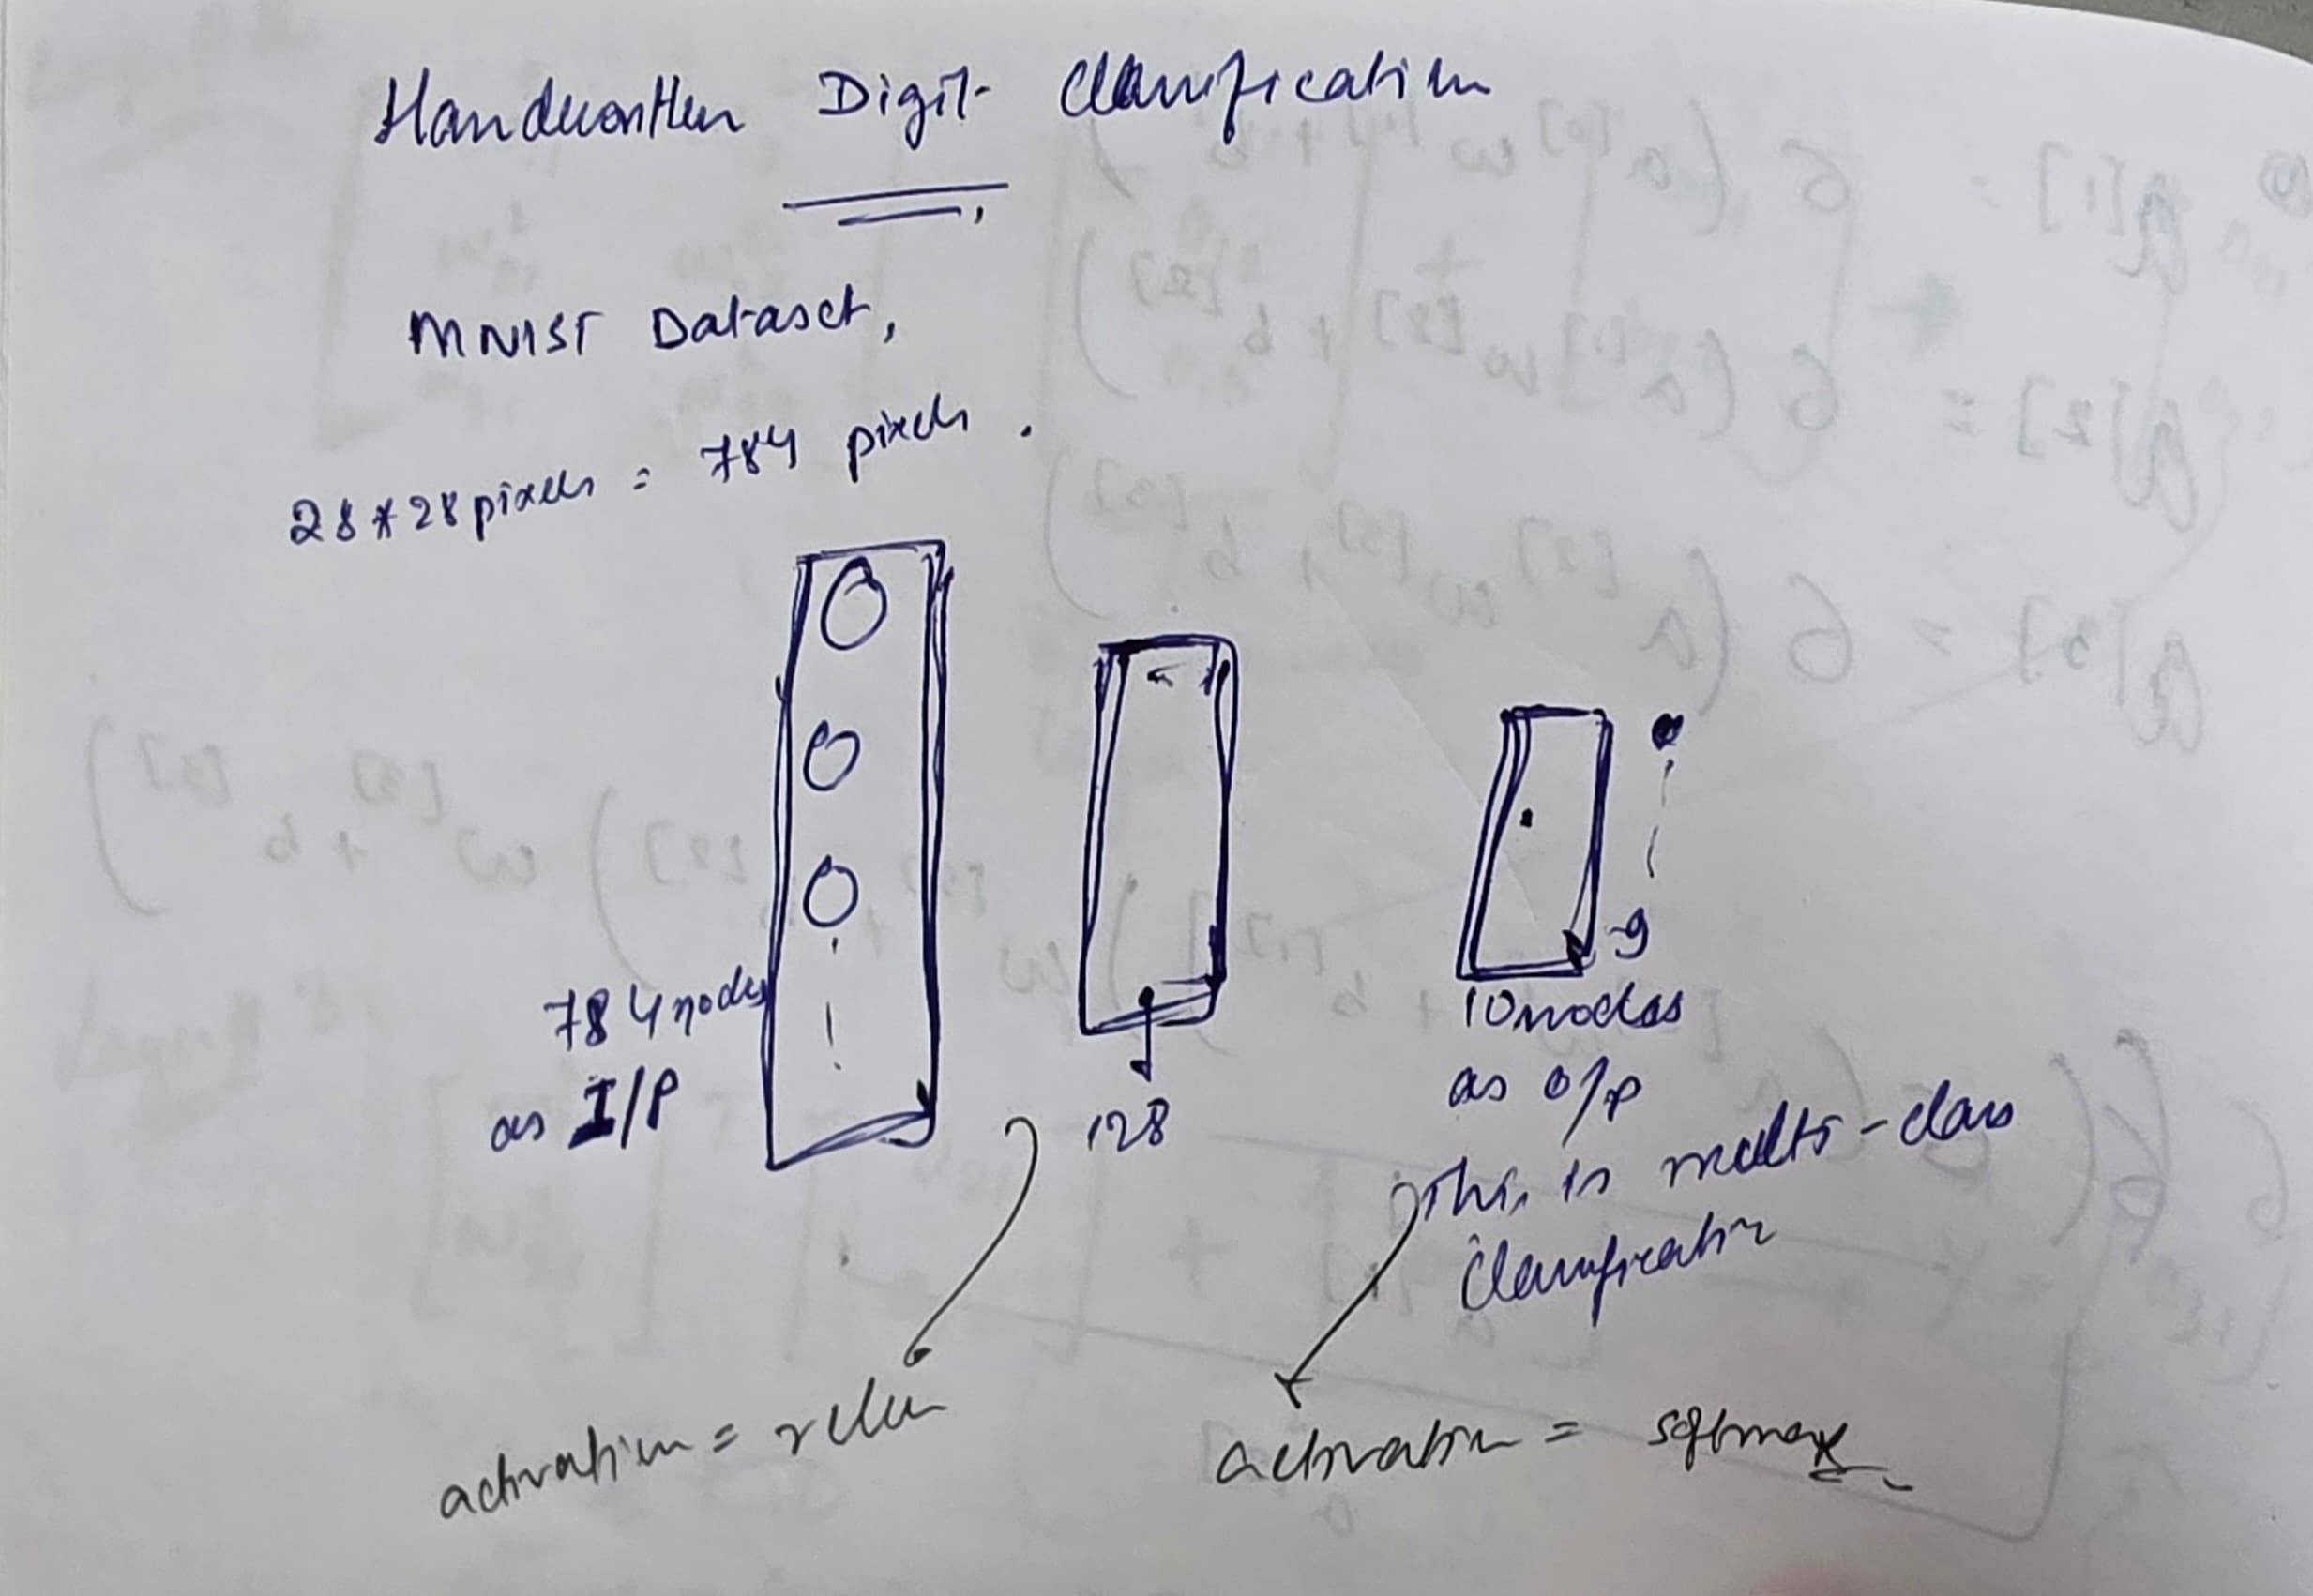

In [15]:
# architecture

model=Sequential()
model.add(Flatten(input_shape=(28,28)))  # 2d to 1-d  # every pixel = 1 node in this layer ..  # this layer would not be required if we use CNN as there we do not have to use flattening of images..
model.add(Dense(128,activation="relu"))  # 2nd layer or 1st hidden layer added .
model.add(Dense(10,activation="softmax"))  # output layer  ,, always remember for multi class classification ,,last layer is always having actiavtion="softmax"

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])  # metrics define what what mercs we want to track..

In [17]:
#early stopping===when accuaracy is not at all incraesing then do early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)
history=model.fit(X_train, y_train, epochs=10,validation_split=0.2,batch_size=10,callbacks=early_stopping)


Epoch 1/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8827 - loss: 0.3997 - val_accuracy: 0.9587 - val_loss: 0.1351
Epoch 2/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9658 - loss: 0.1115 - val_accuracy: 0.9703 - val_loss: 0.0974
Epoch 3/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9783 - loss: 0.0665 - val_accuracy: 0.9733 - val_loss: 0.0939
Epoch 4/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9841 - loss: 0.0489 - val_accuracy: 0.9725 - val_loss: 0.0980
Epoch 5/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9885 - loss: 0.0362 - val_accuracy: 0.9747 - val_loss: 0.0975
Epoch 6/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9910 - loss: 0.0278 - val_accuracy: 0.9737 - val_loss: 0.0980
Epoch 7/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9926 - loss: 0.0217 - val_accuracy: 0.9668 - val_loss: 0.1361
Epoch 8/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9930 - loss: 0

In [19]:
y_prob=model.predict(X_test)  # this is to predict and at each row, we get the probabilties of 0-9 and after this step we will require to get the max probabilty whose..
print(y_prob)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[4.7064941e-10 1.5810137e-09 2.3293271e-07 ... 9.9986839e-01
  9.8502024e-09 5.9050825e-07]
 [8.1983287e-17 5.4324154e-09 9.9999994e-01 ... 3.9859019e-21
  2.0143313e-14 3.7220286e-32]
 [1.0984431e-12 9.9999350e-01 1.6130773e-06 ... 3.0963686e-06
  1.4112620e-06 2.3061737e-11]
 ...
 [3.6404477e-22 6.1250982e-19 1.6354317e-19 ... 3.4466848e-12
  3.2892422e-10 1.2505164e-07]
 [8.7474168e-22 1.0597107e-20 2.0300606e-21 ... 7.3193335e-17
  6.7859453e-08 1.9417408e-16]
 [1.3049375e-15 1.1638507e-21 4.5603228e-18 ... 1.7152503e-21
  6.2244573e-17 2.2709458e-18]]


In [21]:
y_pred=y_prob.argmax(axis=1)  # prob to noss..
print(y_pred)

[7 2 1 ... 4 5 6]


In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9777

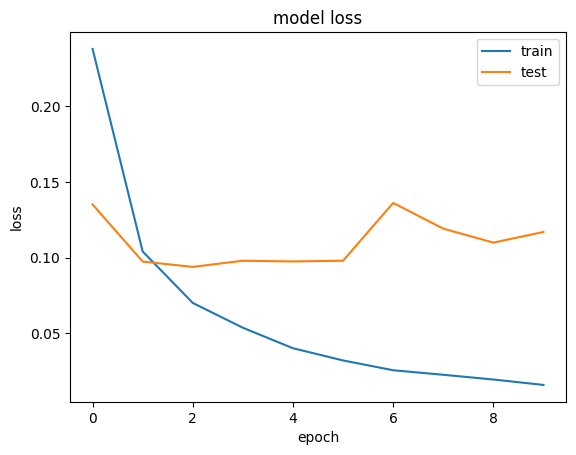

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper right")
plt.show()

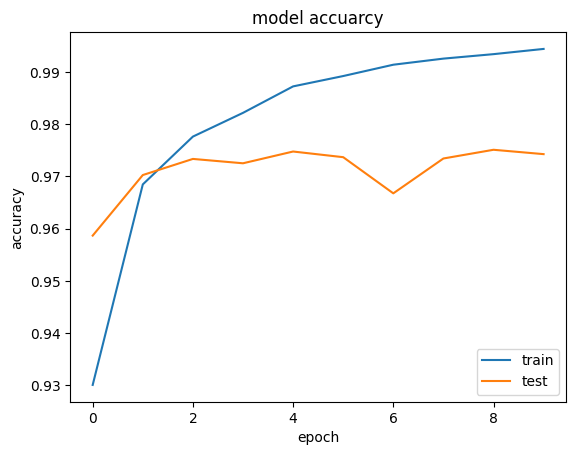

In [30]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuarcy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="lower right")
plt.show()

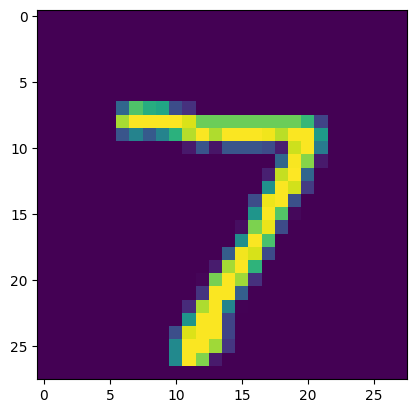

In [31]:
#testing...

plt.imshow(X_test[0])


In [32]:
y_prob=model.predict(X_test[0].reshape( 1,28,28)).argmax(axis=1)
print(y_prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[7]


In [ ]:
## as we can see the image of X_test[0] is showing to be 7 and the answer, the prediction came 7 too